Steel plate faults dataset

 - `PCA` and `GaussianMixture`
 - Scatter plots for each class
 - Outlier detection with `EllipticEnvelope`

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Imports

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import pandas as pd
import scipy as sp

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.covariance import EllipticEnvelope

## Load and prepare data

In [4]:
df = pd.read_csv('../data/steel_plates_faults.csv')

df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Fault
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [5]:
feature_names = list(
    sorted(
        set(df.columns) - set(['Fault'])
    )
)

feature_names

['Edges_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Empty_Index',
 'Length_of_Conveyer',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Luminosity_Index',
 'Maximum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Orientation_Index',
 'Outside_Global_Index',
 'Outside_X_Index',
 'Pixels_Areas',
 'SigmoidOfAreas',
 'Square_Index',
 'Steel_Plate_Thickness',
 'Sum_of_Luminosity',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'X_Maximum',
 'X_Minimum',
 'X_Perimeter',
 'Y_Maximum',
 'Y_Minimum',
 'Y_Perimeter']

In [6]:
X = df[feature_names]
y = df['Fault']

X

,Edges_Index,Edges_X_Index,Edges_Y_Index,Empty_Index,Length_of_Conveyer,LogOfAreas,Log_X_Index,Log_Y_Index,Luminosity_Index,Maximum_of_Luminosity,...,Steel_Plate_Thickness,Sum_of_Luminosity,TypeOfSteel_A300,TypeOfSteel_A400,X_Maximum,X_Minimum,X_Perimeter,Y_Maximum,Y_Minimum,Y_Perimeter
0,0.0498,0.4706,1.0000,0.2415,1687,2.4265,0.9031,1.6435,-0.2913,108,...,80,24220,True,False,50,42,17,270944,270900,44
1,0.7647,0.6000,0.9667,0.3793,1687,2.0334,0.7782,1.4624,-0.1756,123,...,80,11397,True,False,651,645,10,2538108,2538079,30
2,0.9710,0.7500,0.9474,0.3426,1623,1.8513,0.7782,1.2553,-0.1228,125,...,100,7972,True,False,835,829,8,1553931,1553913,19
3,0.7287,0.5385,1.0000,0.4413,1353,2.2455,0.8451,1.6532,-0.1568,126,...,290,18996,False,True,860,853,13,369415,369370,45
4,0.0695,0.2833,0.9885,0.4486,1353,3.3818,1.2305,2.4099,-0.1992,126,...,185,246930,False,True,1306,1289,60,498335,498078,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0.3662,0.5185,0.7273,0.3906,1360,2.4362,1.4472,1.2041,0.0026,141,...,40,35033,False,True,277,249,54,325796,325780,22
1937,0.2118,0.7046,0.7083,0.4554,1360,2.4579,1.4914,1.2305,-0.0582,133,...,40,34599,False,True,175,144,44,340598,340581,24
1938,0.2132,0.7250,0.6818,0.3287,1360,2.4654,1.4624,1.1761,0.0052,140,...,40,37572,False,True,174,145,40,386794,386779,22
1939,0.2015,0.3402,0.6596,0.5904,1360,2.6222,1.5185,1.4914,-0.0171,140,...,40,52715,False,True,170,137,97,422528,422497,47


In [7]:
scaler = StandardScaler()
_ = scaler.fit(X)

In [8]:
X_scaled = scaler.transform(X)

In [9]:
X_scaled.shape

(1941, 27)

## PCA and GMM

In [10]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

In [11]:
X_pca.shape

(1941, 2)

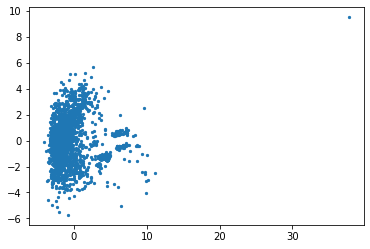

In [12]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], 5)
plt.show()

In [13]:
def y_to_numbers(y):
    
    y_uniq = np.array(y.unique())
    
    d = dict(zip(y_uniq, range(len(y_uniq))))
    
    numbers = [d[class_name] for class_name in y]
    res = np.array(numbers, dtype=int)
    
    return res, y_uniq


In [14]:
y_numb, y_uniq = y_to_numbers(y)

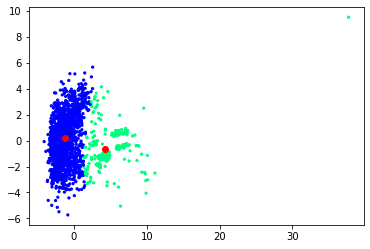

In [15]:
gmm = GaussianMixture(n_components=2, covariance_type='diag').fit(X_pca)
gmm_predicted_classes = gmm.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], 5, c=gmm_predicted_classes, cmap='winter')
plt.plot(gmm.means_[:, 0], gmm.means_[:, 1], 'ro')
plt.show()

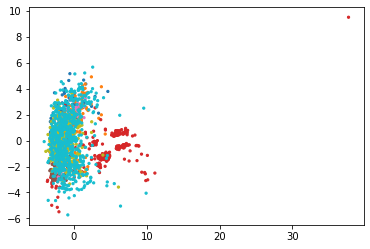

In [16]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], 5, c=y_numb, cmap='tab10')
plt.show()

## Examine scatter plots for each class

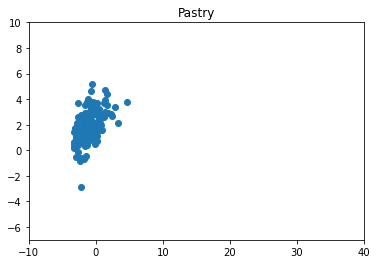

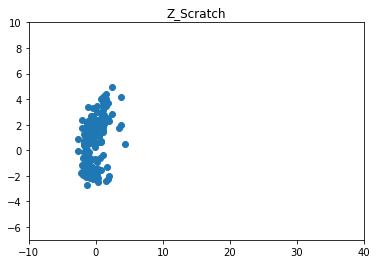

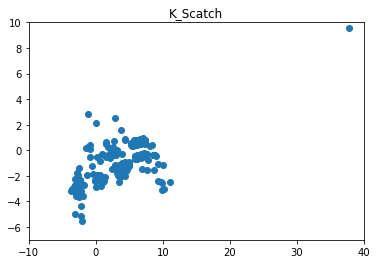

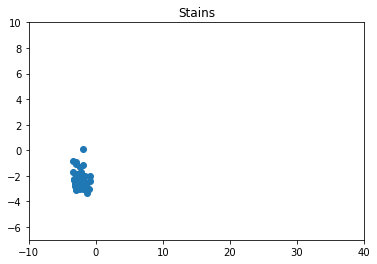

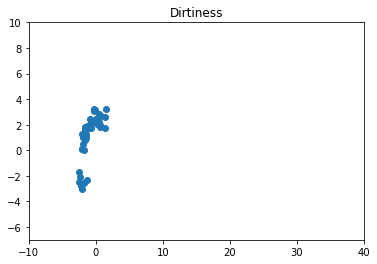

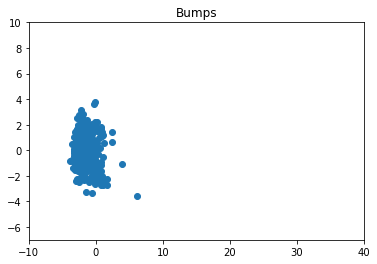

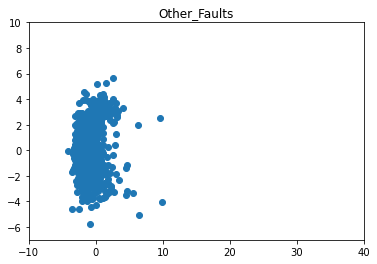

In [17]:
for i, class_name in enumerate(y_uniq):
    
    plt.figure()
    
    mask = (y_numb == i)
    points_of_interest = X_pca[mask]
    
    plt.scatter(points_of_interest[:, 0], points_of_interest[:, 1])
    
    plt.xlim(-10, 40)
    plt.ylim(-7, 10)
    
    plt.title(class_name)

## Identify and isolate one outlier

In [18]:
el_env = EllipticEnvelope(contamination=1e-4)
el_env.fit(X_pca)

EllipticEnvelope(contamination=0.0001)

In [19]:
res = el_env.predict(X_pca)

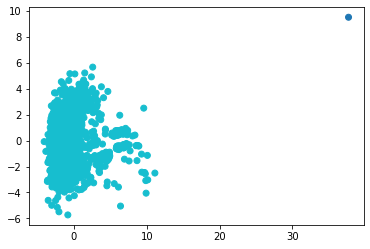

In [20]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=res, cmap='tab10')
plt.show()

In [21]:
np.sum(res == -1)

1

In [22]:
outlier_mask = (res == -1)
inlier_mask = (res == 1)

In [23]:
np.argwhere(outlier_mask)

array([[391]])

In [24]:
X_pca_inliers = X_pca[inlier_mask]

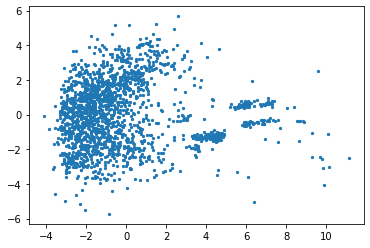

In [25]:
plt.scatter(X_pca_inliers[:, 0], X_pca_inliers[:, 1], 5)
plt.show()

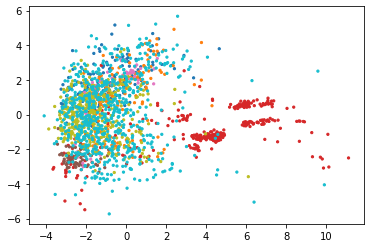

In [26]:
plt.scatter(X_pca_inliers[:, 0], X_pca_inliers[:, 1], 5, c=y_numb[inlier_mask], cmap='tab10')
plt.show()